# Introduction

This project looks into a question that sounds simple but isn’t quite so straightforward: which city actually gets more rain—Seattle or Miami? Seattle has a reputation for being gray and drizzly, while Miami is known for its sudden, heavy tropical storms. To find out the real difference, I looked at daily rainfall data from both cities, comparing their average monthly precipitation and how often it rains throughout the year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


sns.set_style("whitegrid")

# Load the Seattle and Miami data set

In [2]:
df_seattle = pd.read_csv(
    'https://raw.githubusercontent.com/brian-fischer/DATA-5100/main/weather/seattle_rain.csv'
)

In [3]:
df_miami = pd.read_csv('https://www.ncei.noaa.gov/orders/cdo/4136991.csv')


In [4]:
df_seattle.head(10)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/6/18,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/7/18,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/8/18,NaN,NaN,0.41,NaN,NaN,NaN,NaN
8,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",3/12/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
9,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",3/13/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN


# Checking the data types, size of data frame, and numbers of missing values.

In [5]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [6]:
df_miami.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45210 entries, 0 to 45209
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  45210 non-null  object 
 1   NAME     45210 non-null  object 
 2   DATE     45210 non-null  object 
 3   DAPR     751 non-null    float64
 4   MDPR     748 non-null    float64
 5   PRCP     44424 non-null  float64
 6   SNOW     17770 non-null  float64
 7   SNWD     2757 non-null   float64
dtypes: float64(5), object(3)
memory usage: 2.8+ MB


The output shows information about the Seattle and Miami weather datasets, including their size, data types, and missing values. The Seattle dataset contains 1,658 entries with 10 columns, while the Miami dataset is much larger, with 45,210 entries and 8 columns. Most of the columns are numerical, and a few are text-based. Although there are several weather measurments, the only one we care about for this analysis is precipitation (PRCP), which represents daily rainfall. Both datasets include some missing values, but overall they provide enough precipitation data to compare weather patterns between the two cities.

# Checking how many unique stations are present in the Miami data set

In [7]:
df_miami['STATION'].nunique()

46

There are 46 unique stations in the Miami data set

Selecting only one station in the Miami date set

In [8]:
df_miami['NAME'] == 'SUNSET 2.4 SW, FL US'
df_miami = df_miami.loc[df_miami['NAME'] == 'SUNSET 2.4 SW, FL US']
df_miami['STATION'].unique()

array(['US1FLMD0007'], dtype=object)

# Examining the DATE column, converting it into the correct data types, and changing the rage of dates that are present

In [9]:
df_miami['DATE']

1       2018-01-01
2       2018-01-02
3       2018-01-03
4       2018-01-04
5       2018-01-05
           ...    
1806    2022-12-27
1807    2022-12-28
1808    2022-12-29
1809    2022-12-30
1810    2022-12-31
Name: DATE, Length: 1810, dtype: object

In [10]:
df_miami['DATE'].tail()

1806    2022-12-27
1807    2022-12-28
1808    2022-12-29
1809    2022-12-30
1810    2022-12-31
Name: DATE, dtype: object

In [11]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

/var/folders/c_/xvyl08rd0w152pky7b5zssvw0000gn/T/ipykernel_60001/3087519436.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])


In [12]:
df_miami['DATE'] = pd.to_datetime(df_miami['DATE'])

This step checks the range of dates in the dataset and converts them into the correct datetime type so that time-based analyses, like monthly or yearly comparisons, can be done accurately later on.

In [13]:
df_seattle['DATE']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1653   2022-12-27
1654   2022-12-28
1655   2022-12-29
1656   2022-12-30
1657   2022-12-31
Name: DATE, Length: 1658, dtype: datetime64[ns]

In [14]:
df_miami['DATE']

1      2018-01-01
2      2018-01-02
3      2018-01-03
4      2018-01-04
5      2018-01-05
          ...    
1806   2022-12-27
1807   2022-12-28
1808   2022-12-29
1809   2022-12-30
1810   2022-12-31
Name: DATE, Length: 1810, dtype: datetime64[ns]

In [15]:
df_seattle['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [16]:
df_miami['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [17]:
df_miami = df_miami.loc[df_miami['DATE'] >= '2018-01-01']

This code ensure that both datasets cover the same date range from January 1, 2018 to December 31, 2022.

In [18]:
df_miami.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
1,US1FLMD0007,"SUNSET 2.4 SW, FL US",2018-01-01,NaN,NaN,0.00,0.0,NaN
2,US1FLMD0007,"SUNSET 2.4 SW, FL US",2018-01-02,NaN,NaN,0.00,NaN,NaN
3,US1FLMD0007,"SUNSET 2.4 SW, FL US",2018-01-03,NaN,NaN,0.48,NaN,NaN
4,US1FLMD0007,"SUNSET 2.4 SW, FL US",2018-01-04,NaN,NaN,0.07,NaN,NaN
5,US1FLMD0007,"SUNSET 2.4 SW, FL US",2018-01-05,NaN,NaN,0.00,NaN,NaN


# Joining both data frames, keeping DATE and PRCP columns

Performing an outer join

In [19]:
df = df_miami[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='outer')

An outer join is used here to make sure no data is lost from either city. It keeps all the dates from both the Miami and Seattle datasets, even if one city is missing data for certain days. This way, the final combined data frame includes the full time range from both locations, allowing for a more complete comparison of rainfall patterns.

In [20]:
df = pd.melt(df, id_vars='DATE', var_name='city', value_name='precipitation')

In [21]:
df.head(10)

,DATE,city,precipitation
0,2018-01-01,PRCP_x,0.00
1,2018-01-02,PRCP_x,0.00
2,2018-01-03,PRCP_x,0.48
3,2018-01-04,PRCP_x,0.07
4,2018-01-05,PRCP_x,0.00
5,2018-01-06,PRCP_x,0.00
6,2018-01-07,PRCP_x,0.00
7,2018-01-08,PRCP_x,0.01
8,2018-01-09,PRCP_x,0.11
9,2018-01-10,PRCP_x,0.19


Renaming the city values 'SEA' and 'MIA'

In [22]:
df.loc[df['city'] == 'PRCP_x', 'city'] = 'MIA'

In [23]:
df.loc[df['city'] == 'PRCP_y', 'city'] = 'SEA'

Renaming the column to be lowercase

In [24]:
df = df.rename(columns={'DATE': 'date'})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3648 non-null   datetime64[ns]
 1   city           3648 non-null   object        
 2   precipitation  3443 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.6+ KB


# Identifying and filling in missing values

In [26]:
df.isna().sum()

date               0
city               0
precipitation    205
dtype: int64

In [27]:
df.loc[df['city'] == 'SEA', 'precipitation'].isna().sum()

np.int64(188)

There are 188 missing precipitation values in Seattle data

In [28]:
df.loc[df['city'] == 'MIA', 'precipitation'].isna().sum()

np.int64(17)

There are 17 missing precipitation values in Miami data

# Replacing missisng values with the mean across years of values on that day

Defining a column that labels each day by the day of the year

In [29]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

Computing the mean precipitation for each day in Seattle averaged across years

In [30]:
mean_day_precipitation_sea = df.loc[
    df['city'] == 'SEA',
    ['precipitation', 'day_of_year']
].groupby(
    'day_of_year'
).mean()

Computing the mean precipitation for each day in Miami averaged across years

In [31]:
mean_day_precipitation_mia = df.loc[
    df['city'] == 'MIA',
    ['precipitation', 'day_of_year']
].groupby(
    'day_of_year'
).mean()

Getting the index of each row where precipitation is missing

In [32]:
indices = np.where(df['precipitation'].isna() == True)[0]

In [33]:
indices

array([ 203,  204,  205,  206,  207,  208,  230,  231, 1054, 1055, 1056,
       1057, 1058, 1059, 1060, 1061, 1062, 1832, 1833, 1834, 1835, 1836,
       1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847,
       1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858,
       1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869,
       1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880,
       1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891,
       1892, 1893, 2088, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136,
       2137, 2138, 2193, 2194, 2195, 2212, 2213, 2242, 2243, 2244, 2245,
       2246, 2247, 2284, 2285, 2286, 2360, 2361, 2366, 2367, 2368, 2369,
       2370, 2371, 2372, 2373, 2374, 2375, 2415, 2416, 2417, 2418, 2419,
       2420, 2421, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2557,
       2558, 2559, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608,
       2609, 2610, 2816, 2817, 2818, 2819, 2820, 28

Replacing each missing value with the mean on that day in the corresponding city

In [34]:
for index in indices:
    if df.loc[index, 'city'] == "SEA":
        df.loc[index, 'precipitation'] = mean_day_precipitation_sea.loc[df.loc[index, 'day_of_year']].values[0]
    else:
        df.loc[index, 'precipitation'] = mean_day_precipitation_mia.loc[df.loc[index, 'day_of_year']].values[0]

Check for missing values in our data

In [35]:
df.isna().sum()

date             0
city             0
precipitation    0
day_of_year      0
dtype: int64

No missing data in the data frame


# Plotting the daily precipitatoin for both cities

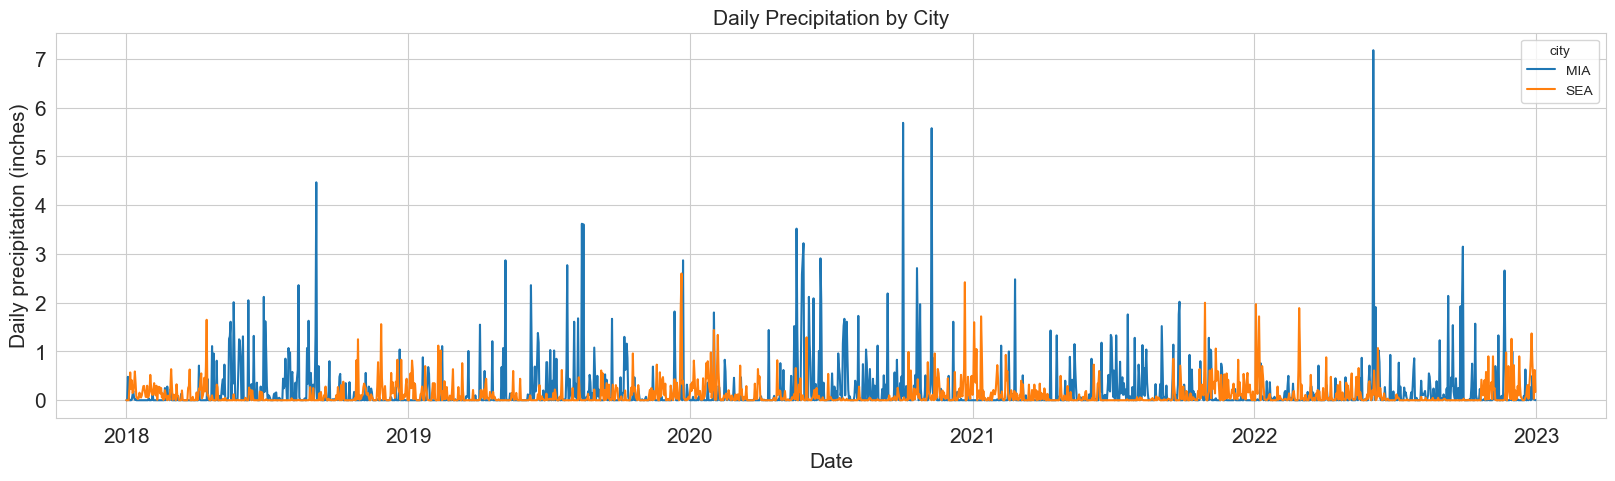

In [36]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily precipitation (inches)', fontsize=15)
plt.title('Daily Precipitation by City', fontsize=15)
plt.tick_params(labelsize=15)

plt.show()

This graph shows the daily precipitation for Miami and Seattle from 2018 to 2023. Each line represents how much rain fell on a given day in each city. Miami’s (blue line) rainfall appears in short, intense spikes, showing that it tends to have heavier rain but less frequently. Seattle’s (orange line) rainfall is lighter and more consistent, with smaller spikes spread evenly throughout the years.

# Computing basic numerical summaries for precipitation in each city

In [37]:
df[['city', 'precipitation']].groupby('city').describe()

precipitation                                                
             count      mean       std  min  25%   50%   75%   max
city                                                              
MIA         1824.0  0.185703  0.507735  0.0  0.0  0.00  0.10  7.18
SEA         1824.0  0.113395  0.240618  0.0  0.0  0.01  0.12  2.60

The summary shows that Miami experiences heavier rainfall overall compared to Seattle. Miami’s average precipitation (0.19 inches) and maximum daily rainfall (7.18 inches) are both higher than Seattle’s average (0.11 inches) and maximum (2.60 inches).

# Plotting the mean precipitation by month

In [38]:
df['month'] = pd.DatetimeIndex(df['date']).month

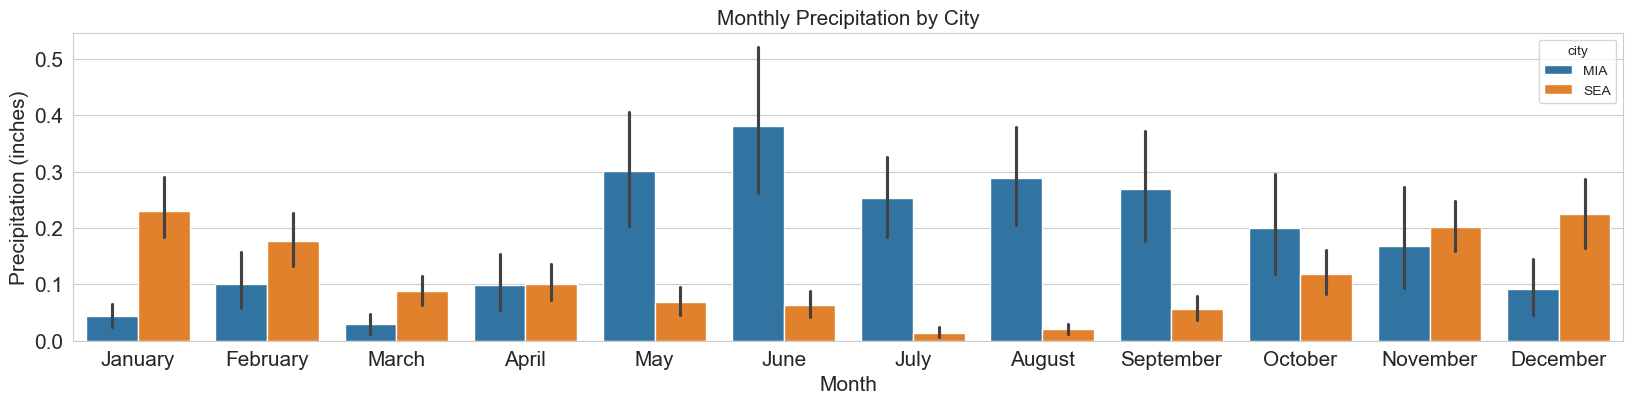

In [39]:
plt.figure(figsize=(20, 4))

sns.barplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.title('Monthly Precipitation by City', fontsize=15)
plt.tick_params(labelsize=15)

import calendar
month_names = list(calendar.month_name[1:])
plt.xticks(ticks=range(12), labels=month_names)

plt.xticks(ticks=range(12), labels=month_names)

plt.show()

This bar graph confirms that Miami receives more precipitation in the summer months (May-September), while Seattle receives more in the winter months (November-March).

# Plotting the proportion of days with any precipitation

Add a new variable to the data frame indicating the year

In [40]:
df['year'] = pd.DatetimeIndex(df['date']).year

df.head()

,date,city,precipitation,day_of_year,month,year
0,2018-01-01,MIA,0.00,1,1,2018
1,2018-01-02,MIA,0.00,2,1,2018
2,2018-01-03,MIA,0.48,3,1,2018
3,2018-01-04,MIA,0.07,4,1,2018
4,2018-01-05,MIA,0.00,5,1,2018


Add a new variable to the data frame indicating whether precipitation occurred

In [41]:
df['any_precipitation'] = df['precipitation'] > 0

In [42]:
df.head()

,date,city,precipitation,day_of_year,month,year,any_precipitation
0,2018-01-01,MIA,0.00,1,1,2018,False
1,2018-01-02,MIA,0.00,2,1,2018,False
2,2018-01-03,MIA,0.48,3,1,2018,True
3,2018-01-04,MIA,0.07,4,1,2018,True
4,2018-01-05,MIA,0.00,5,1,2018,False


Plot the proportion of days with precipitation each month

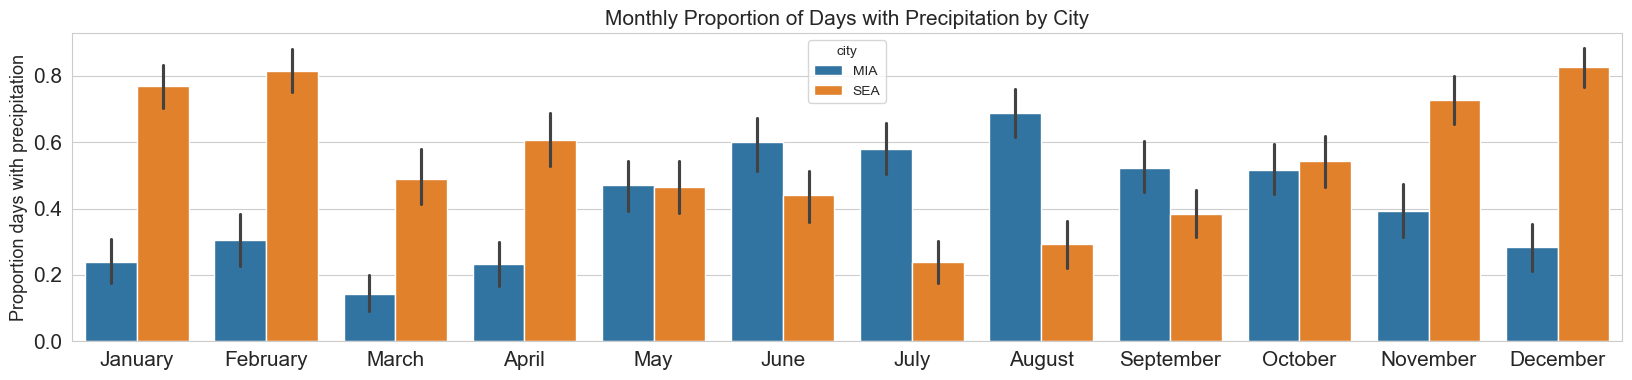

In [43]:
plt.figure(figsize=(20, 4))

sns.barplot(data=df, x='month', y='any_precipitation', hue='city')

plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize=13)
plt.xticks(ticks=range(12), labels=month_names)
plt.title('Monthly Proportion of Days with Precipitation by City', fontsize=15)
plt.tick_params(labelsize=15)

plt.show()

The graph shows that Seattle has more days with precipitation in the winter months (November–April), while Miami has more in the summer months (June–September). This reflects Seattle’s wet winters and Miami’s rainy summer season.


# Performing a statistical test for differences in mean monthly precipitation between Miami and Seattle

$$H_0: \mu_{\text{Seattle, January}} = \mu_{\text{Miami, January}}$$
$$H_a: \mu_{\text{Seattle, January}} \neq \mu_{\text{Miami, January}}$$

$$\vdots$$

$$H_0: \mu_{\text{Seattle, December}} = \mu_{\text{Miami, December}}$$
$$H_a: \mu_{\text{Seattle, December}} \neq \mu_{\text{Miami, December}}$$

In [44]:
from scipy import stats

In [45]:
significance_level = 0.05
significantly_different = np.zeros(12)

for month in range(1, 13):
    sea_data = df.loc[(df['city'] == 'SEA') & (df['month'] == month), 'precipitation']
    mia_data = df.loc[(df['city'] == 'MIA') & (df['month'] == month), 'precipitation']

    t_statistic, p_value = stats.ttest_ind(sea_data, mia_data, equal_var=False)

    if p_value < significance_level:
        significantly_different[month-1] = 1

    print(f"Month {month}:")
    print(f"  t-statistic = {t_statistic:.2f}")
    print(f"  p-value t test = {p_value:.3f}")
    print("-" * 20)

Month 1:
  t-statistic = 6.33
  p-value t test = 0.000
--------------------
Month 2:
  t-statistic = 2.06
  p-value t test = 0.041
--------------------
Month 3:
  t-statistic = 3.64
  p-value t test = 0.000
--------------------
Month 4:
  t-statistic = 0.04
  p-value t test = 0.967
--------------------
Month 5:
  t-statistic = -4.36
  p-value t test = 0.000
--------------------
Month 6:
  t-statistic = -4.71
  p-value t test = 0.000
--------------------
Month 7:
  t-statistic = -6.66
  p-value t test = 0.000
--------------------
Month 8:
  t-statistic = -5.93
  p-value t test = 0.000
--------------------
Month 9:
  t-statistic = -4.01
  p-value t test = 0.000
--------------------
Month 10:
  t-statistic = -1.59
  p-value t test = 0.114
--------------------
Month 11:
  t-statistic = 0.65
  p-value t test = 0.518
--------------------
Month 12:
  t-statistic = 3.28
  p-value t test = 0.001
--------------------


The result show significant differences in mean precipitation between Miami and Seattle in most months (Jan–Mar, May–Sep, Dec). However, April, October, and November show no significant differences, indicating similar precipitation levels during these three months.

Plotting the mean precipitation each month. (Star indicate for significant differences)

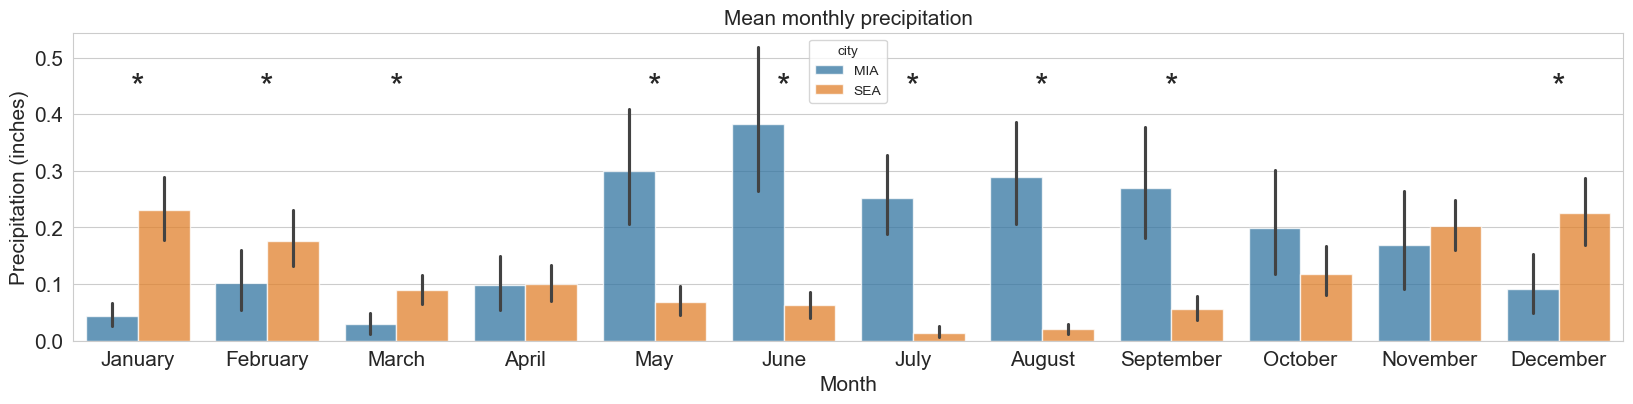

In [46]:
plt.figure(figsize=(20, 4))

sns.barplot(data=df, x='month', y='precipitation', hue='city', alpha=0.75)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.title('Mean monthly precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

for month in range(12):
    if significantly_different[month] == 1:

        plt.text(month, 0.43, '*', ha='center', fontsize=25)

plt.show()

The plot compares the mean monthly precipitation between Miami (MIA) and Seattle (SEA) throughout the year.Miami gets most of its rain in the summer months, especially around June, while Seattle is rainier in the winter, from November through February. The stars above some months show where the difference between the two cities is statistically significant. Overall, the plot highlights how Miami has wet summers and dry winters, while Seattle has the opposite pattern